## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [281]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [282]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [283]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve

In [284]:
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [285]:
#read the students data file
student_df = pd.read_csv("students-data.csv",delimiter=';')

In [286]:
# printing first 5 rows from student datframe
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [287]:
# printing the last 5 rows
student_df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [288]:
# printing the column names 
student_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [289]:
# setting the index name to 'number'
student_df.index.names = ['number']

In [290]:
# pringing the first 5 rows to check if index name is set
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [291]:
# checking the number of rows and columns
student_df.shape

(395, 33)

In [292]:
# checking if there is any missing values in any of the columns
student_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

We see there is no missing values/spaces. This means that the columns can be zero where numeric values are expected. Its just that none of the columns are having spaces

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [293]:
# printing the column names whose data types is object

student_df.select_dtypes(include='object').columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [294]:
# printing the first 5 rows with only object type columns

student_df.select_dtypes(include='object').head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [295]:
# checking the data types of columns

student_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [296]:
# checking the variance of columns

student_df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

We see there are 5 columns with variance less than 1

In [297]:
# dropping the columns whose variance is less than 1

for i in student_df.columns:
    if student_df[i].dtypes == 'int64':
        if student_df[i].var() < 1:
            student_df = student_df.drop(i,axis=1)

# printing the variance again to check if the less variance columns are dropped

print(student_df.var())

age          1.628285
Medu         1.198445
Fedu         1.184180
goout        1.239388
Walc         1.658678
health       1.932944
absences    64.049541
G1          11.017053
G2          14.148917
G3          20.989616
dtype: float64


In [298]:
# checking the number of columns
student_df.shape

(395, 27)

We see that those 5 columns are dropped now

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [299]:
#printing the columns with data type object

student_df.select_dtypes(include='object').columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [300]:
# importing LabelEncoder library

from sklearn import preprocessing
le=preprocessing.LabelEncoder()

# For each object columns, converting the values to numeric

for i in student_df.select_dtypes(include='object').columns:
    le.fit(student_df[i])
    student_df[i]= le.transform(student_df[i])

#printing the data frame first 5 rows to see if categorical values are converted to numeric

student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


We see all the categorical values are now converted to zeroes

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [301]:
# For columns G1, G2 and G3, if the value is >10, the its pass. Else fail.

for i in ('G1','G2','G3'):
    student_df[i] = np.where(student_df[i] >= 10, 'pass(1)', 'fail(0)')

In [302]:
# printing the first 5 rows to check if the column values are changed

student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,fail(0),fail(0),fail(0)
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,fail(0),fail(0),fail(0)
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,fail(0),fail(0),pass(1)
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,pass(1),pass(1),pass(1)
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,fail(0),pass(1),pass(1)


In [303]:
# encoding the pass/fail values into binary values

for i in ('G1','G2','G3'):
    student_df[i] = pd.get_dummies(student_df[i],drop_first=True)

# printing the dataframe to check the values

student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


The values in G1.G2 and G3 are encoded to 0s and 1s

## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [304]:
# creating feature(X) and target(y) dataframes

X=student_df.drop('G3',axis=1)
y=student_df[['G3']]

In [305]:
# printing the feature dataset first 5 rows

X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,1,0,0,4,1,3,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,0,1,1,0,3,1,3,4,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,1,0,2,3,3,10,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,1,2,1,5,2,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,1,0,0,2,2,5,4,0,1


In [306]:
# printing the target dataset first 5 rows

y.head()

,G3
number,
0,0
1,0
2,1
3,1
4,1


## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

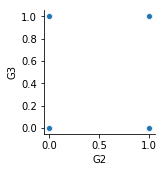

In [307]:
sns.pairplot(data=student_df,x_vars='G2', y_vars='G3')


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

In [308]:
student_df.groupby('school').count()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
school,,,,,,,,,,,,,,,,,,,,,
0,349,349,349,349,349,349,349,349,349,349,...,349,349,349,349,349,349,349,349,349,349
1,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46


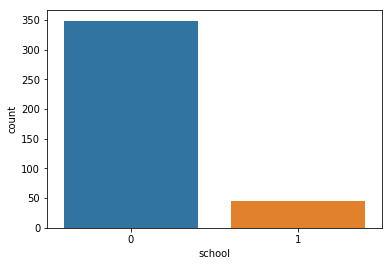

In [309]:
# count plot for number of students in each school

sns.countplot(student_df['school'])

There are 46 students in MS school and 349 students in GP school

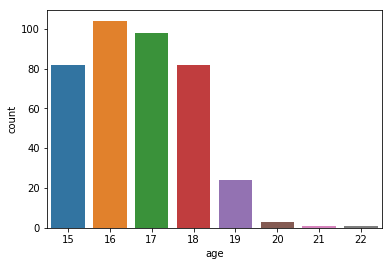

In [310]:
# count plot for number of students under different age groups

sns.countplot(student_df['age'])

In [311]:
student_df.groupby('age').count()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
age,,,,,,,,,,,,,,,,,,,,,
15,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
16,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,104,104
17,98,98,98,98,98,98,98,98,98,98,...,98,98,98,98,98,98,98,98,98,98
18,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
19,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
20,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
21,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
22,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


We see that the students are between age 15 and 22 and the counts are plotted 

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [312]:
# splitting the data set into train and test
# the train data size should be 300

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300, random_state=7)

In [313]:
# printing the number of rows in train and test data set

print("Number of rows in train dataset is : ", X_train.shape[0])
print("Number of rows in test dataset is  : ", X_test.shape[0])

Number of rows in train dataset is :  300
Number of rows in test dataset is  :  95


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [314]:
# creating object of Logistic Regression 

lr_model = LogisticRegression()

In [315]:
# Fitting Logistic Regression to the Training set with linear kernel

lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [316]:
# Predicting the Test set results

y_predict = lr_model.predict(X_test)

# printing predicted y values

y_predict

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0], dtype=uint8)

In [ ]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_predict)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

In [317]:
# checking the train accuracy

lr_model.score(X_train,y_train)

0.9066666666666666

In [318]:
# checking test accuracy

lr_model.score(X_test,y_test)

0.9578947368421052

In [319]:
# f1 score is calculated

f1_score(y_predict,y_test)

0.9714285714285714

In [320]:
# printing the confusion matrix

metrics.confusion_matrix(y_predict,y_test)

array([[23,  2],
       [ 2, 68]], dtype=int64)

# Naive bayes with Iris data

### Import Iris.csv

In [95]:
iris_df=pd.read_csv("Iris.csv")

In [96]:
iris_df.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [97]:
iris_df.tail()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [98]:
iris_df.shape

(150, 5)

In [99]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [100]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width in (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal length (in cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal width (in cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


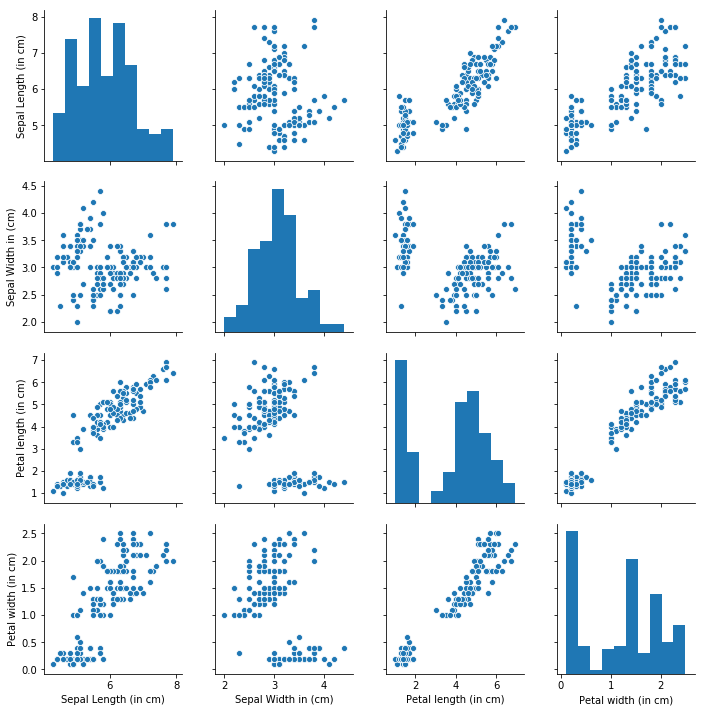

In [101]:
sns.pairplot(data=iris_df)

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [102]:
iris_df.columns

Index(['Sepal Length (in cm)', 'Sepal Width in (cm)', 'Petal length (in cm)',
       'Petal width (in cm)', 'Class'],
      dtype='object')

In [161]:
#Spliting the dataset in independent and dependent variables
X=iris_df.drop('Class',axis=1)
y=iris_df[['Class']]

In [162]:
X.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [163]:
y.head()

,Class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


### Find the distribution of target variable (Class)

In [164]:
y.describe()

,Class
count,150
unique,3
top,Iris-versicolor
freq,50


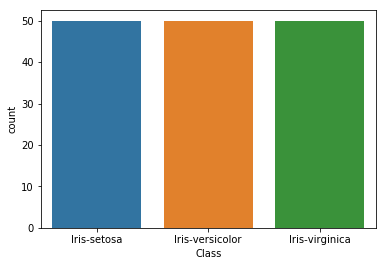

In [165]:
sns.countplot(data=y,x='Class')

### Plot the distribution of target variable using histogram

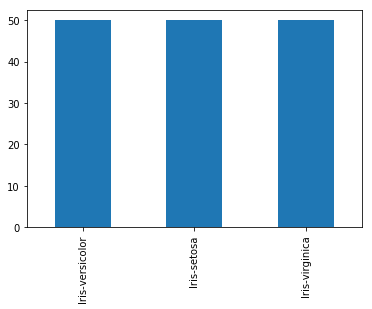

In [166]:
pd.value_counts(y["Class"]).plot(kind="bar")

In [167]:
iris_df.groupby('Class').count()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

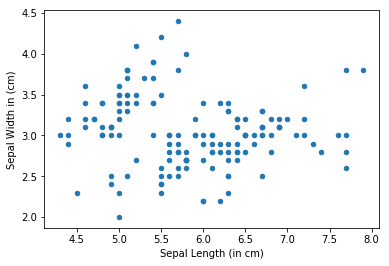

In [110]:
iris_df.plot.scatter(x='Sepal Length (in cm)',y='Sepal Width in (cm)')

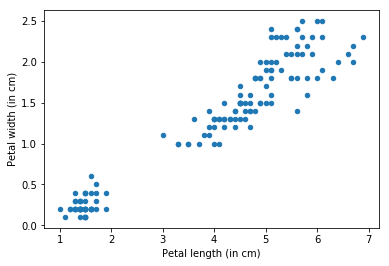

In [111]:
iris_df.plot.scatter(x='Petal length (in cm)',y='Petal width (in cm)')

##### As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal

### Summary Statistics and explain insights for at least 2 variables

In [112]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width in (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal length (in cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal width (in cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


### Correlation among all variables and give your insights

In [113]:
iris_df.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000


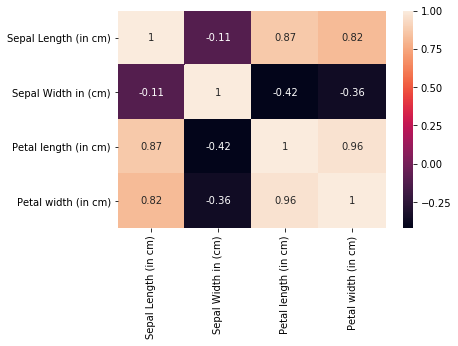

In [114]:
sns.heatmap(iris_df.corr(), annot=True)

### Split data in Training and Validation in 80:20

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20, random_state=7)

In [116]:
X.shape[0]

150

In [117]:
X_train.shape[0]

120

In [118]:
X_test.shape[0]

30

### Do Feature Scaling

In [119]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Train and Fit NaiveBayes Model

In [120]:
from sklearn.naive_bayes import GaussianNB

In [121]:
nb_model=GaussianNB()

In [122]:
nb_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [123]:
nb_model.score(X_train,y_train)

0.9833333333333333

In [124]:
nb_model.score(X_test,y_test)

0.8333333333333334

In [125]:
y_predict=nb_model.predict(X_test)

In [126]:
metrics.confusion_matrix(y_predict,y_test)

array([[7, 0, 0],
       [0, 9, 2],
       [0, 3, 9]], dtype=int64)

In [127]:
y_test.groupby('Class').Class.agg('count')

Class
Iris-setosa         7
Iris-versicolor    12
Iris-virginica     11
Name: Class, dtype: int64

In [212]:
y_array= []
for i in y_test.index:
    print(y_test.loc[i:2])

KeyError: 2

In [ ]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test.values,y_predict)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

## Confusion Matrix Inferences :

####    1. There are 7 species of Iris-setosa which is predicted correctly    
####    2. There are actually 12 species of Iris-versicolor, out of which 9 are predicted correctly. And 3 are wrongly predicted as Iris-virginica    
####  3. There actually 11 species of Iris-virginica, out of which 9 are predicted correctly and 2 are wrongly predicted as Iris-versicolor